# Computing camera calibration and distortion coefficients

['camera_cal\\calibration1.jpg', 'camera_cal\\calibration10.jpg', 'camera_cal\\calibration11.jpg', 'camera_cal\\calibration12.jpg', 'camera_cal\\calibration13.jpg', 'camera_cal\\calibration14.jpg', 'camera_cal\\calibration15.jpg', 'camera_cal\\calibration16.jpg', 'camera_cal\\calibration17.jpg', 'camera_cal\\calibration18.jpg', 'camera_cal\\calibration19.jpg', 'camera_cal\\calibration2.jpg', 'camera_cal\\calibration20.jpg', 'camera_cal\\calibration3.jpg', 'camera_cal\\calibration4.jpg', 'camera_cal\\calibration5.jpg', 'camera_cal\\calibration6.jpg', 'camera_cal\\calibration7.jpg', 'camera_cal\\calibration8.jpg', 'camera_cal\\calibration9.jpg']
camera_cal\calibration1.jpg
No lines
camera_cal\calibration10.jpg
camera_cal\calibration11.jpg
camera_cal\calibration12.jpg
camera_cal\calibration13.jpg
camera_cal\calibration14.jpg
camera_cal\calibration15.jpg
camera_cal\calibration16.jpg
camera_cal\calibration17.jpg
camera_cal\calibration18.jpg
camera_cal\calibration19.jpg
camera_cal\calibratio

'\nimg_dir = \'camera_cal\'\nfor image in glob.glob(os.path.join(img_dir,\'*.jpg\')):\n    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)\n    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)\n    if ret == True:\n        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)\n        plt.imshow(image)\n    else:\n        print("No lines")\n'

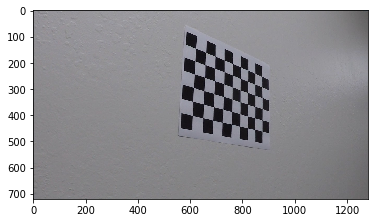

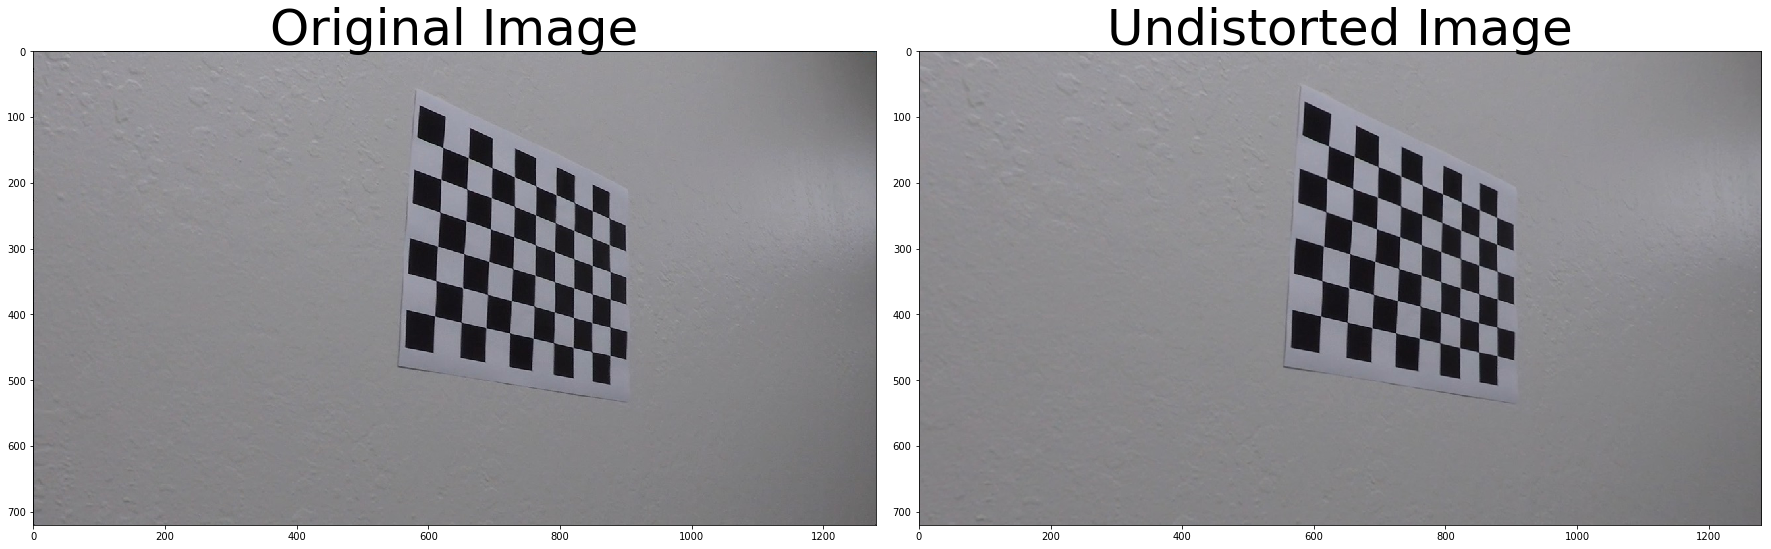

In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import glob
%matplotlib inline

#Read in one image to test
board1 = 'camera_cal/calibration1.jpg'
img = cv2.imread(board1)


#Reading in multiple files with glob
images = glob.glob(os.path.join(img_dir,'*.jpg'))
print(images)

objpoints = []
imgpoints = []
for ny in [5,6]:
    for nx in [6,7,8,9]:
        # prepare object points like (0,0,0),(1,0,0),(2,0,0)...(7,5,0)
        objp = np.zeros((ny*nx,3), np.float32)
        objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2) #x, y coordinates
try:
    for i in images:
        print(i)
        img = mpimg.imread(i)
        #Converting image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        #Finding Chessboard Corners
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

        # If the corners are found, add object points, and image points
        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)

            # Draw and display the corners
            cv2.drawChessboardCorners(gray, (nx, ny), corners, ret)
            plt.imshow(img)
        else:
            print("No lines")
        
except:
    print("Nothing yet...")

        
# Calibrating Camera
ret,mtx,dist,rvecs,tvecs = cv2.calibrateCamera(objpoints,imgpoints, gray.shape[::-1],None,None)
dst = cv2.undistort(img,mtx,dist,None,mtx )


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)